/Users/junyulyu/Library/Caches/pypoetry/virtualenvs/mine-seg-sat-14bnJD6w-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


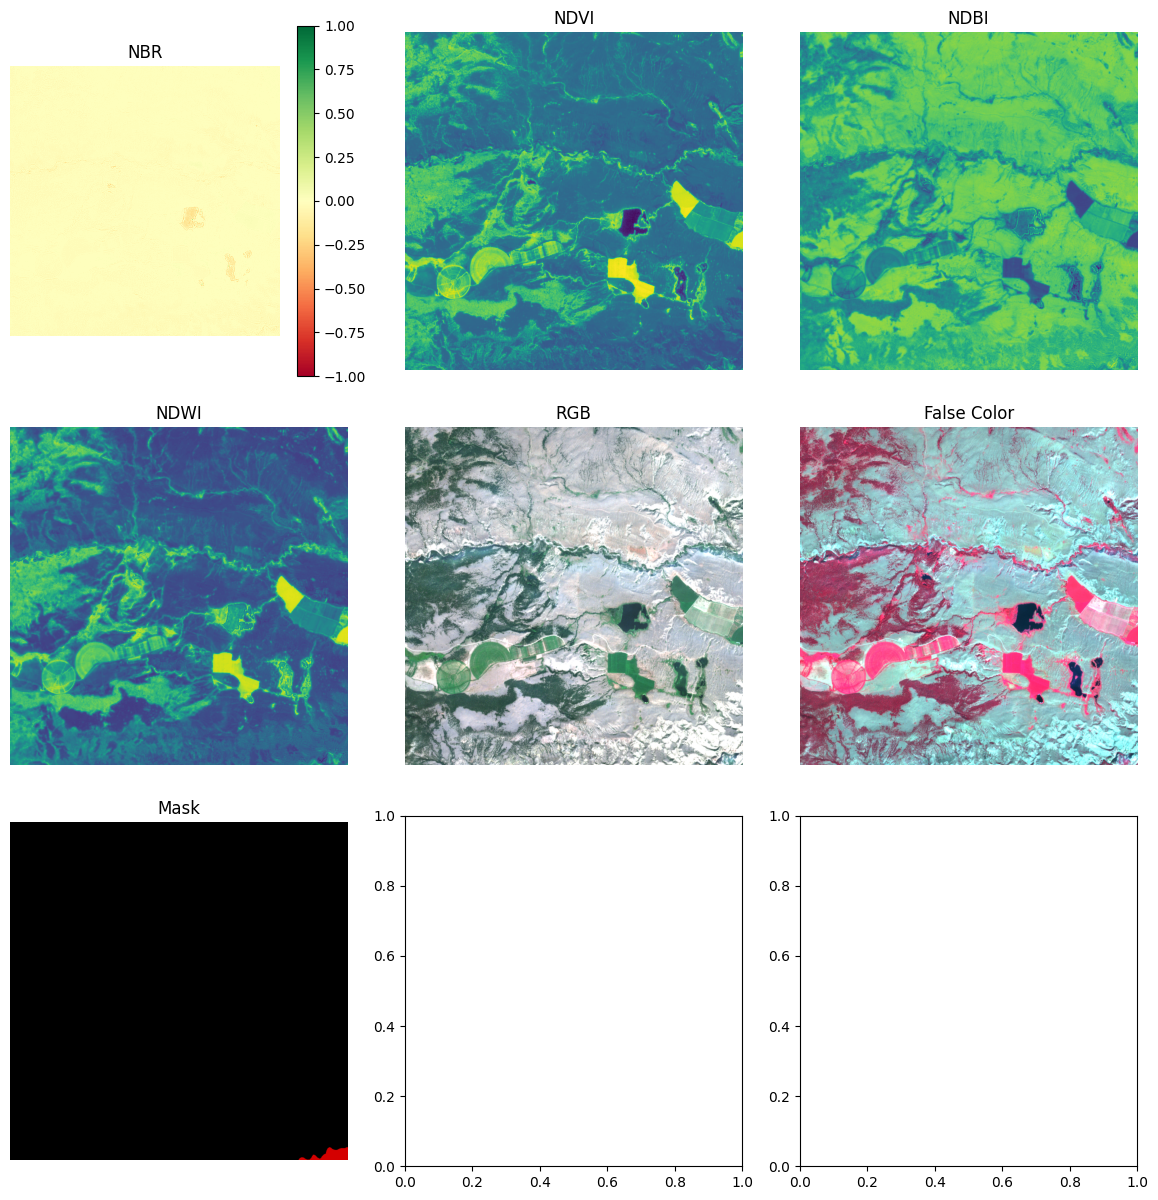

In [1]:
import dataset
from pathlib import Path
from dotenv import load_dotenv
import os

load_dotenv()

data_path = Path(os.getenv("prepare_dataset_folder"))
split = "train"  # or 'val' or 'test', depending on your dataset_splits.csv

# Instantiate the dataset
forest_sat_dataset = dataset.MineSATDataset(split=split, data_path=data_path)

index = 3

# Display the transformed images including NBR and NDVI
forest_sat_dataset.display_transformed_images(index)


In [2]:

import numpy as np
import csv

def save_numerical_values_to_csv(numerical_values, csv_filename):
    # Flatten the numerical values and prepare them for writing to a CSV file
    flattened_data = {}
    for key, value in numerical_values.items():
        if isinstance(value, np.ndarray):
            flattened_data[key] = value.flatten()
        else:
            flattened_data[key] = value

    # Find the longest array in the flattened data
    max_length = max(len(v) for v in flattened_data.values())

    # Ensure all arrays are the same length, filling with NaN where necessary
    for key in flattened_data:
        length = len(flattened_data[key])
        if length < max_length:
            flattened_data[key] = np.pad(flattened_data[key], (0, max_length - length), constant_values=np.nan)

    # Write to CSV
    with open(csv_filename, 'w', newline='') as csvfile:
        fieldnames = list(flattened_data.keys())
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i in range(max_length):
            row = {key: flattened_data[key][i] for key in fieldnames}
            writer.writerow(row)


In [3]:
numerical_values = {key: numerical_values[key] for key in ['NDVI', 'NBR']}

save_numerical_values_to_csv(numerical_values, "/Users/junyulyu/Desktop/Capstone/Useroutput.csv")


{'NDVI': array([[ 0.27130797,  0.13434882, -0.08432045, ...,  0.05912487,
         0.2253742 , -0.09781214],
       [ 0.42189686,  0.16286021,  0.10499055, ..., -0.07826104,
         0.09798442,  0.09227807],
       [ 0.39889901,  0.34066629,  0.30950048, ..., -0.12418654,
        -0.10729095,  0.09614276],
       ...,
       [ 0.2374528 ,  0.15729361,  0.2063871 , ..., -0.30330495,
        -0.30135685, -0.28154624],
       [ 0.08284145,  0.08245369,  0.03315888, ..., -0.18202423,
        -0.22592244, -0.28372131],
       [ 0.16142337,  0.18667621,  0.10433047, ..., -0.15154538,
         0.01580104, -0.22068383]]), 'NBR': array([[-0.03786477,  0.00261567, -0.01283831, ...,  0.02613253,
         0.03194702, -0.0700545 ],
       [-0.00891129,  0.01145529,  0.01570594, ..., -0.02597115,
         0.03796872,  0.02960616],
       [-0.02296935,  0.01345805,  0.02199087, ..., -0.030052  ,
        -0.03849775,  0.0581881 ],
       ...,
       [-0.02811177,  0.00971764, -0.01131737, ..., -0.042